In [1]:
import pandas as pd
import scipy.io as io
import numpy as np
import scanpy as scp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

from parameters import *

import sys
sys.path.append('../../')
import single_cell_tools.tools as scttools
import single_cell_tools.plot as sctplot

In [2]:
obs = pd.read_csv("cell_annotation.csv", sep=",").set_index("Unnamed: 0")
obs

,Total_mRNAs,num_genes_expressed,Size_Factor,Dataset,Combined_Dataset,MitoFraction,Cell_type,Cell_type_refined,pseudotime_slingshot,arterial_score,venous_score,Cell_cycle_phase
Unnamed: 0,,,,,,,,,,,,
AAACCTGGTGCTCTTC-1-2,4134,1509,0.309311,E10.5_E_01,E10.5 E,0.049589,Endo (Wnt_low),Endo (Wnt_low) [VE],4.728201,-0.034986,0.060613,S
AAACCTGTCAACGAAA-1-2,14457,3333,1.081690,E10.5_E_01,E10.5 E,0.019921,Endo (other),Endo (other),1.633389,0.012410,0.288447,G1
AAACGGGAGGAGCGAG-1-2,5394,1646,0.403586,E10.5_E_01,E10.5 E,0.020208,Endo (low quality),Endo (low quality),NaN,0.202469,-0.420899,NaN
AAACGGGGTAAACCTC-1-2,5282,1570,0.395206,E10.5_E_01,E10.5 E,0.044491,Endo (low quality),Endo (low quality),NaN,-0.082343,0.052980,NaN
AAAGATGGTGATGTCT-1-2,3615,1177,0.270479,E10.5_E_01,E10.5 E,0.068326,Endo (low quality),Endo (low quality),NaN,0.073201,0.135501,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATATGAGA-1-b,14244,3444,1.632261,E10.5_E+HE+IAC_cR1_CrePos,E10.5 E+HE+IAC Runx1-Cre,0.022255,NaN,NaN,NaN,-0.187613,-0.405060,NaN
TTTGTCACATGGGAAC-1-b,10535,2974,1.207236,E10.5_E+HE+IAC_cR1_CrePos,E10.5 E+HE+IAC Runx1-Cre,0.023256,NaN,NaN,NaN,-0.041084,-0.261180,NaN
TTTGTCACATTGGTAC-1-b,10332,2839,1.183974,E10.5_E+HE+IAC_cR1_CrePos,E10.5 E+HE+IAC Runx1-Cre,0.015583,NaN,NaN,NaN,-0.173826,-0.580468,NaN


In [3]:
var = pd.read_csv("gene_annotation.csv", sep=",")
var

,id,symbol
0,ENSMUSG00000051951,Xkr4
1,ENSMUSG00000089699,Gm1992
2,ENSMUSG00000102343,Gm37381
3,ENSMUSG00000025900,Rp1
4,ENSMUSG00000109048,Rp1
...,...,...
27993,ENSMUSG00000079808,AC168977.1
27994,ENSMUSG00000095041,PISD
27995,ENSMUSG00000063897,DHRSX
27996,ENSMUSG00000096730,Vmn2r122


In [4]:
X_raw = pd.read_csv("gene_by_cell_count_matrix.txt", sep=" ")
X_raw

,%%MatrixMarket,matrix,coordinate,integer,general
0,27998,46048,150452272,NaN,NaN
1,8,1,2,NaN,NaN
2,11,1,1,NaN,NaN
3,17,1,1,NaN,NaN
4,52,1,1,NaN,NaN
...,...,...,...,...,...
150452268,27916,46048,1,NaN,NaN
150452269,27917,46048,1,NaN,NaN
150452270,27918,46048,18,NaN,NaN
150452271,27919,46048,1,NaN,NaN


In [5]:
X = csr_matrix((27998,46048))
X[X_raw.iloc[1:,0]-1,X_raw.iloc[1:,1]-1] = X_raw.iloc[1:,2]

/opt/conda/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [8]:
adata = scp.AnnData(X.transpose(), obs=obs, var = var, layers={"Raw":X.transpose()})
adata.write("./Zhu.h5ad")

/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'Dataset' as categorical
... storing 'Combined_Dataset' as categorical
... storing 'Cell_type' as categorical
... storing 'Cell_type_refined' as categorical
... storing 'Cell_cycle_phase' as categorical
... storing 'symbol' as categorical


In [9]:
adata = adata[[i == False for i in adata.obs["Cell_type"].isna().values],:]

# Preprocessing

In [10]:
mtgenes = ["mt-" in i for i in adata.var.loc[:,"symbol"].values]
scttools.qc_metrics(adata,mtgenes)

Trying to set attribute `.obs` of view, copying.


In [11]:
#adata.X = adata.layers["Raw"].copy()
scp.pp.normalize_total(adata,target_sum=np.mean(adata.obs["#counts"].values))
scp.pp.log1p(adata)
scp.pp.highly_variable_genes(adata)
scp.pp.pca(adata,n_comps=20,use_highly_variable=True)
scp.pp.neighbors(adata,metric="euclidean",knn=20)
scp.tl.umap(adata)

2025-01-27 13:14:53.549312: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-01-27 13:14:53.549325: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


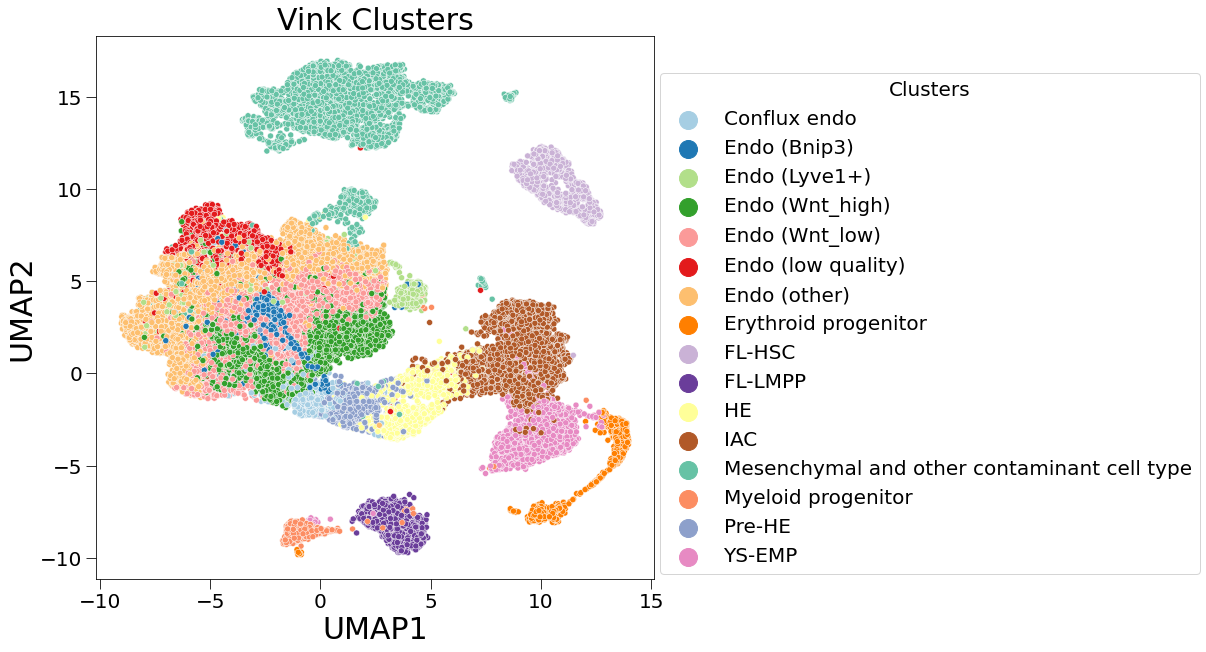

In [37]:
fig,ax = plt.subplots(figsize=[10,10])

scp.tl.leiden(adata,resolution = .5)
X = adata.obsm["X_umap"]
#hue = [i+"_"+j for i,j in adata.obs[["Stage","Sorted"]].values]
hue = adata.obs["Cell_type"]
unique_hues = len(hue.unique())
palette = ([i for i in sns.color_palette("Paired")] + [i for i in sns.color_palette("Set2")])[:unique_hues]
sns.scatterplot(x=X[:,0],y=X[:,1],hue=hue,palette=palette)
sctplot.plot_base(ax,labels=["UMAP1","UMAP2"],title="Zhu Clusters",legend_title="Clusters",legend_size=20,legend_markerscale=3,legend_pos=(1.01,0.01))

fig.savefig("Plots/Zhu_umaps.pdf",bbox_inches="tight",transparent=True)
plt.show()

In [38]:
adata.write("Zhu.h5ad")

In [42]:
adata.X[:10,:10].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.2031753 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.1948224 , 0.        , 1.1948224 , 0.76615864, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.4235065 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.3233652 , 0.        , 1.7236569 , 1.7236569 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.0652761 , 0.        , 0.        , 2.0652761 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        3.2526462 , 0.        , 1.6376586 , 2.2285323 , 0.        ],
       [0.        , 0.        , 0.       